In [2]:
import argparse
from glob import glob
from os import path
import pickle
from nilearn import plotting
from nistats.thresholding import map_threshold
import sys

from utils.firstlevel_utils import get_first_level_objs
from utils.firstlevel_plot_utils import (plot_design, plot_design_timeseries, 
                                         plot_design_heatmap, plot_contrast,
                                        plot_map)

/media/Data/Ian/miniconda/envs/SO/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/media/Data/Ian/miniconda/envs/SO/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/media/Data/Ian/miniconda/envs/SO/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
parser = argparse.ArgumentParser(description='2nd level Entrypoint Script.')
parser.add_argument('-derivatives_dir', default=None)
parser.add_argument('--skip_first', action='store_true')
parser.add_argument('--skip_second', action='store_true')
parser.add_argument('--save', action='store_true')

if '-derivatives_dir' in sys.argv or '-h' in sys.argv:
    args = parser.parse_args()
else:
    args = parser.parse_args([])
    args.derivatives_dir = '/mnt/OAK/data/uh2/BIDS_data/derivatives/'
    args.data_dir = '/mnt/OAK/data/uh2/BIDS_data/'
    args.tasks = ['stroop']
    args.rt=True
    args.save=True
    %matplotlib inline

In [4]:
# set paths
first_level_dir = path.join(args.derivatives_dir, '1stlevel')
second_level_dir = path.join(args.derivatives_dir,'2ndlevel')
fmriprep_dir = path.join(args.derivatives_dir, 'fmriprep', 'fmriprep')
tasks = ['ANT', 'CCTHot', 'discountFix',
        'DPX', 'motorSelectiveStop',
        'stopSignal', 'stroop',
        'twoByTwo', 'WATT3']
save = args.save
run_first_level = not args.skip_first
run_second_level = not args.skip_second

# Design Visualization

In [5]:
# load design
subject_id, task = 's358', 'stroop'
files = get_first_level_objs(subject_id, task, first_level_dir, regress_rt=False)
subjinfo = pickle.load(open(files[0], 'rb'))

/media/Data/Ian/miniconda/envs/SO/lib/python3.5/site-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedReader name='/mnt/OAK/data/uh2/BIDS_data/derivatives/1stlevel/s358/stroop/firstlevel_RT-False_beta-False.pkl'>
  after removing the cwd from sys.path.


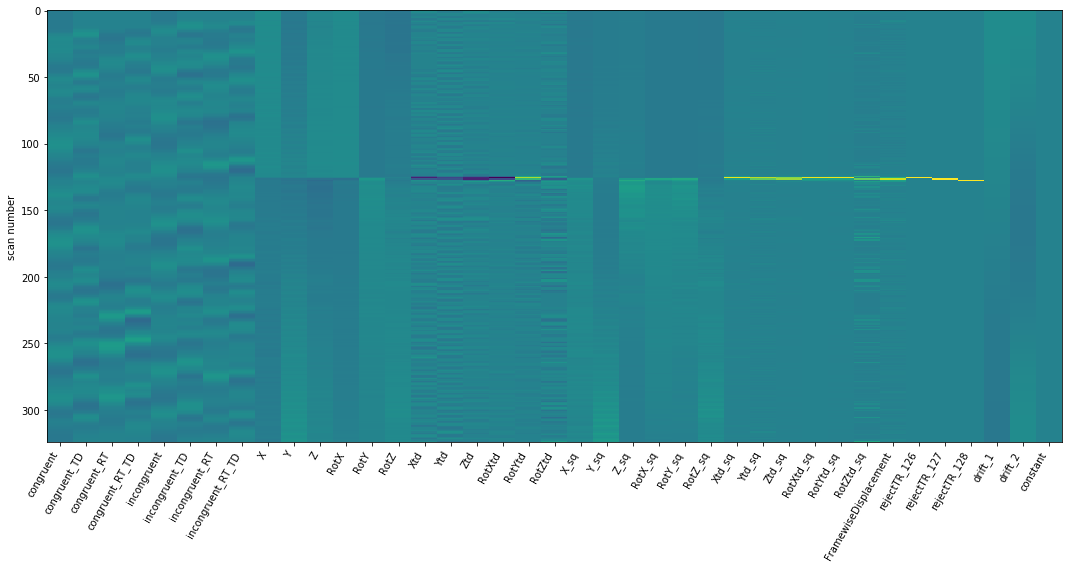

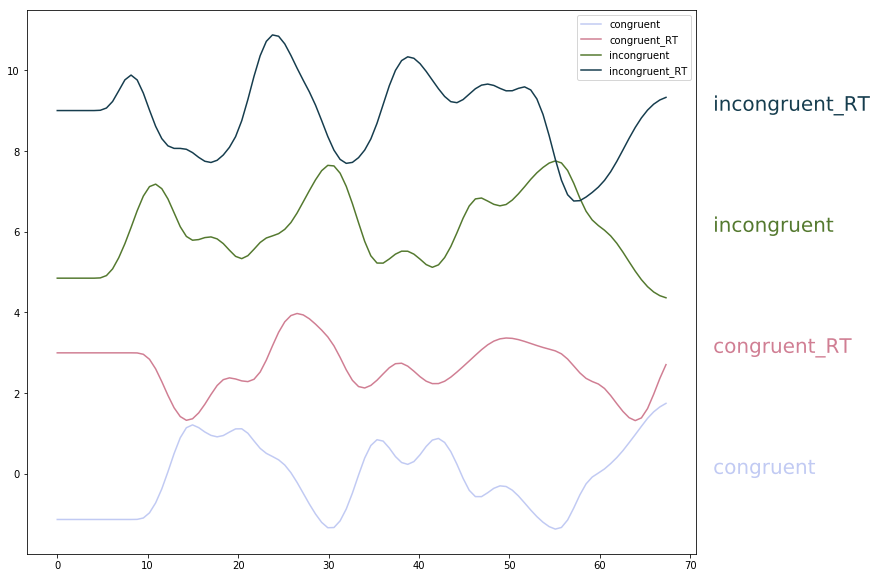

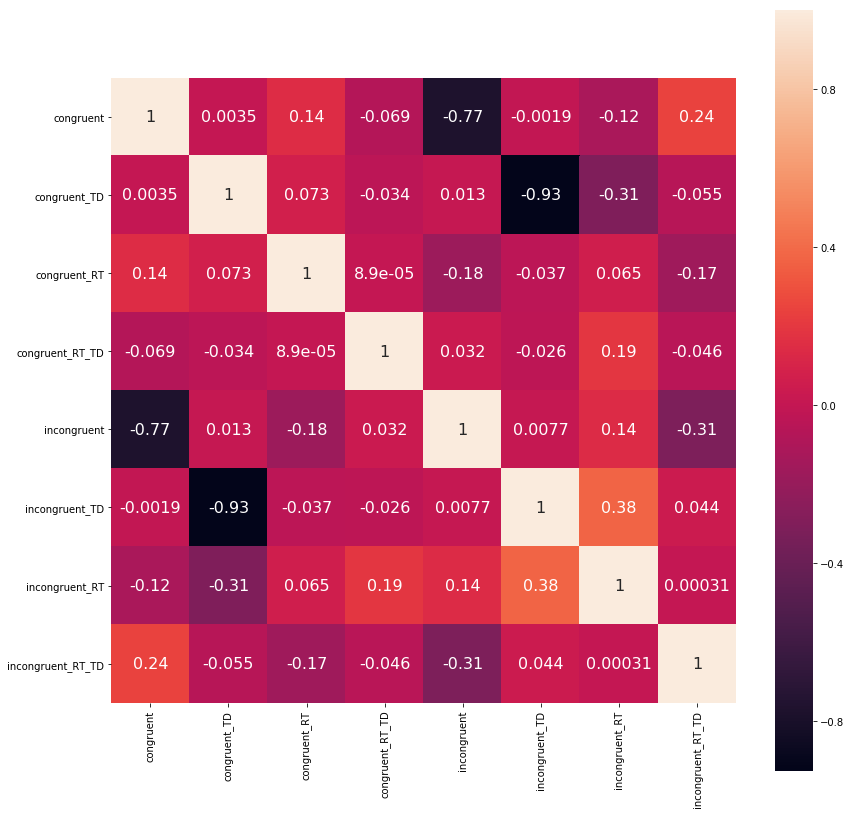

In [6]:
plot_design(subjinfo)
plot_design_timeseries(subjinfo, 0, 100)
plot_design_heatmap(subjinfo)

# First Level Visualization

In [ ]:
if run_first_level:
    for task in tasks:
        contrast_maps = glob(path.join(first_level_dir, '*', task, '*maps*', '*.nii.gz'))
        for map_file in contrast_maps:
            contrast_name = map_file[map_file.index('contrast')+9:].rstrip('.nii.gz')
            f_simple = plot_map(map_file, title=contrast_name, simple_plot=True)
            f = plot_map(map_file, title=contrast_name, simple_plot=False)
            if save:
                simple_output = map_file.replace('.nii.gz', '_glass.pdf')
                output = map_file.replace('.nii.gz', '_glass.pdf')
                f_simple.savefig(simple_output)
                f.savefig(output)

# Second Level Visualization

In [ ]:
if run_second_level:
    threshold = 'None' # None
    for task in tasks:
        contrast_maps = glob(path.join(second_level_dir, task, '*maps', '*.nii.gz'))
        for map_file in contrast_maps:
            if save:
                output = map_file.replace('.nii.gz', '_threshold-%s.pdf' % threshold)
            else:
                output = None
            contrast_name = map_file[map_file.index('contrast')+9:].rstrip('.nii.gz')
            if threshold is None:
                z_map = map_file
            elif threshold == 'FDR':
                z_map, threshold1 = map_threshold(map_file, level=.05, height_control='fdr')
            plotting.plot_stat_map(z_map, title='%s: %s' % (task, contrast_name),
                                  output_file=output)